In [1]:
from time import time
import pandas as pd
import os
import re
import numpy as np
from pprint import pprint

t0 = time()

print('INFO: done importing libraries and dataset in %0.3fs.' % (time() - t0))


t0 = time()

hits = pd.read_json('datasets/20200126-20200312-hits.json', lines=True)
hits.head()

print('INFO: done reading in dataset to pandas dataframe in %0.3fs.' % (time() - t0))



t0 = time()

hits = hits.drop(columns=['_id', 'hit_set_id', 'assignment_duration_in_seconds', 'creation_time', 'assignable_hits_count', 'latest_expiration_time', 'caller_meets_requirements', 'caller_meets_preview_requirements', 'last_updated_time', 'monetary_reward', 'accept_project_task_url', 'requester_url', 'project_tasks_url', 'project_requirements', 'requesterInfo'], axis=1)
hits.head()

print('INFO: done columns from dataframe in %0.3fs.' % (time() - t0))

# removes all punctuation from the description and title if any
t0 = time()

hits['processed_description'] = hits['description'].map(lambda d : re.sub('[,.$()@#%&~!?]', ' ', d))
hits['processed_title'] = hits['title'].map(lambda t : re.sub('[,.$()@#%&~!?]', ' ', t))


hits['processed_description'] = hits['processed_description'].str.replace('\W', ' ')
hits['processed_description'] = hits['processed_description'].map(lambda d : re.sub('\d', '', d))
hits['processed_description'] = hits['processed_description'].str.replace('\s+', ' ')

hits['processed_title'] = hits['processed_title'].map(lambda d : re.sub('\d', '', d))
hits['processed_title'] = hits['processed_title'].str.replace('\W', ' ')
hits['processed_title'] = hits['processed_title'].str.replace('\s+', ' ')



print('INFO: done removing punctuation and numbers from title and description in %0.3fs.' % (time() - t0))

print(hits['processed_description'])
# cleans dataframe by converting all characters to lowercase and removing non-english characters
# t0 = time()

def clean_dat(chunk):
    # Read stopwords
    with open('datasets/stops.txt', 'r') as f:
        stops = f.read().split('\n')

    return ' '.join([ w for w in chunk.split() if w not in set(stops)])

# converts to low caps
hits['processed_description'] = hits['processed_description'].map(lambda x: x.lower())

hits['processed_title'] = hits['processed_title'].map(lambda x: x.lower())

print('INFO: removing stopwords, duplicates, and numbers')

print('INFO: processed_description shape before dropping empty descriptions',hits['processed_description'].shape[0])
print('INFO: processed_title shape before dropping stop words and number', hits['processed_title'].shape[0])

t0 = time()

# removes non allowable characters
hits['processed_description'] = hits['processed_description'].map(lambda x: clean_dat(x))
hits['processed_title'] = hits['processed_title'].map(lambda x: clean_dat(x))

print(hits['processed_description'])

nan_value = float("NaN")
hits.replace("", nan_value, inplace=True)

print('INFO: processed_description shape after removing stopwords, duplicates, and numbers', hits['processed_description'].shape[0])

print('INFO: processed_title shape after removing stopwords, duplicates, and numbers', hits['processed_title'].shape[0])
# print('INFO: requester_name shape after removing stopwords, duplicates, and numbers', hits['requester_name'].shape)

INFO: done importing libraries and dataset in 0.000s.
INFO: done reading in dataset to pandas dataframe in 247.285s.
INFO: done columns from dataframe in 20.452s.
INFO: done removing punctuation and numbers from title and description in 43.477s.
0          You will be presented an image of a gym cardio...
1          Given a sentence and a noun from that sentence...
2                               Transcribing data from image
3          Extract all the items from the receipt You wil...
4          Verify the value of single data point such as ...
                                 ...                        
1108697                           Transcribe data from image
1108698    If this transaction appeared on your bank stat...
1108699    Transcribe all of the purchased items and tota...
1108700                           Transcribe data from image
1108701    If this transaction appeared on your bank stat...
Name: processed_description, Length: 1108702, dtype: object
INFO: removing stopword

In [4]:
# hits.dropna(inplace=True)


# hits['processed_description'].drop_duplicates(keep=False, inplace=True)
# hits['processed_title'].drop_duplicates(keep=False, inplace=True)
# hits.drop_duplicates(keep=False, inplace=True)
# hits = hits[hits['processed_description'].notna()]

req_description = hits.drop(['processed_title', 'title', 'description', 'requester_id'], axis=1)

req_title = hits.drop(['processed_description', 'title', 'description', 'requester_id'], axis=1)

print('INFO: req_description shape', req_description['processed_description'].shape[0])

print('INFO: req_title shape', req_title['processed_title'].shape[0])

# print('INFO: finished removing stopwords, duplicates, and numbers in %0.3fs' % (time() - t0))

# print('INFO: processed_title shape after removing stopwords, duplicates, and numbers', hits['processed_title'].shape)

# print('INFO: requester_name shape after removing stopwords, duplicates, and numbers', hits['requester_name'].shape)

print(hits.ndim)
# hits['requester_name'].value_counts().head(10)
hits.head()

INFO: req_description shape 1108702
INFO: req_title shape 1108702
2


,requester_id,requester_name,title,description,processed_description,processed_title
0,A13PNDK4YW47PL,amturk,Input specific values displayed in the image.,You will be presented an image of a gym cardio...,presented image gym cardio workout console tas...,input specific values displayed image
1,A3UENPLNM9AQBK,BIU NLP,Write question-answer pairs about verbal nouns...,Given a sentence and a noun from that sentence...,sentence noun sentence write questions answers...,write question answer pairs verbal nouns produ...
2,AAE8HYZ2P1HCS,A2Z,Data Entry from images (P641),Transcribing data from image,transcribing data image,data entry images
3,A38RXMI7DFPL8G,411Richmond,Extract purchased items from a shopping receip...,Extract all the items from the receipt. You wi...,extract items receipt bonus item correctly tra...,extract purchased items shopping receipt item ...
4,A38RXMI7DFPL8G,411Richmond,Verify a single value from a receipt,Verify the value of single data point (such as...,verify single data point store payment informa...,verify single receipt


In [74]:
req_d = req_description
req_description.head()

req_t = req_title

In [75]:
req_d.requester_name.value_counts()

Panel                  400699
Ibotta, Inc.            57289
411Richmond             55919
Shopping Receipts       49162
p9r                     44926
                        ...  
Ryan Fehr                   1
EJH                         1
Terence Wang                1
shuhan                      1
Marius Cosmin Lazar         1
Name: requester_name, Length: 3950, dtype: int64

(1108702,)
(1108702,)
1108702
1108702
['Panel', 'Ibotta, Inc.', '411Richmond', 'Shopping Receipts', 'p9r', 'Rece Capture', 'MLDataLabeler', 'Crowdsurf Support', 'TeamZ', 'lovergingers', 'Rest of Requesters']
[400699, 57289, 55919, 49162, 44926, 36025, 34017, 31734, 31336, 24841, 342754]
1108702
                    Number of HITs
Panel                       400699
Ibotta, Inc.                 57289
411Richmond                  55919
Shopping Receipts            49162
p9r                          44926
Rece Capture                 36025
MLDataLabeler                34017
Crowdsurf Support            31734
TeamZ                        31336
lovergingers                 24841
Rest of Requesters          342754
\begin{tabular}{lr}
\toprule
{} &  Number of HITs \\
\midrule
Panel              &          400699 \\
Ibotta, Inc.       &           57289 \\
411Richmond        &           55919 \\
Shopping Receipts  &           49162 \\
p9r                &           44926 \\
Rece Capture       &  

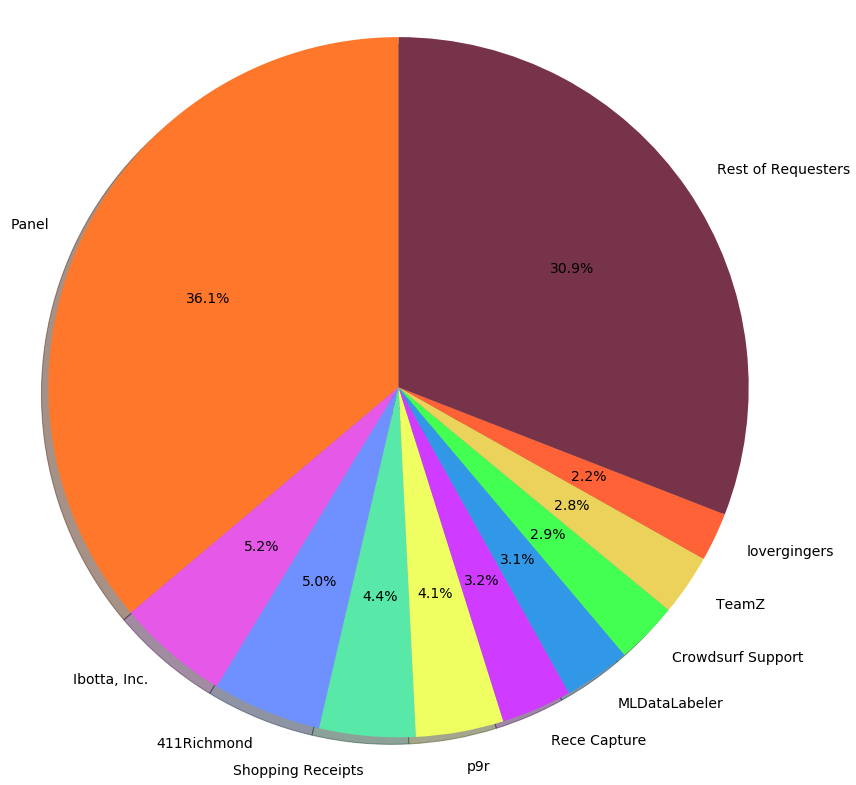

In [82]:
print(req_d['requester_name'].shape)
print(req_d['processed_description'].shape)


top_requesters = req_d.requester_name.value_counts().index.tolist()
top_requesters = top_requesters[:10]

top_requesters.append('Rest of Requesters')

# top_requesters.append('Total HITs')
description_count = req_d.requester_name.value_counts().tolist()

print(sum(description_count))

print(sum(description_count[:10]) + sum(description_count[10:]))

print(top_requesters)


hit_count = description_count[:10]
hit_count.append(sum(description_count[10:]))

# hit_count.append(sum(description_count))
print(hit_count)
print(sum(hit_count))


top_requesters_df = pd.DataFrame(hit_count, columns = ['Number of HITs'], index=top_requesters)

print(top_requesters_df)
print(top_requesters_df.to_latex(index=True))

plt.rcParams['font.size'] = 14.0

colors = ['#FF772B', '#E658E8', '#6E91FF', '#58E8A7', '#EFFF61', 
          '#CF3CFF', '#3198E8', '#42FF52', '#EBD25B', '#FF6236', 
          '#77334a'
         ]



# Pie chart, where the slices will be ordered and plotted counter-clockwise:
fig1, ax1 = plt.subplots(figsize=(14, 14))

ax1.pie(hit_count, labels=top_requesters, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.rcParams['font.size'] = 14.0
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig('results_figures/hit_analysis/top10-pi.png')
plt.show()


In [ ]:
# View number of hits before hand

print(req_d.processed_description.isnull().sum())
print(req_d.processed_description.notnull().sum())

drop_d = req_d.dropna()

print(drop_d.requester_name.shape)
print(drop_d.processed_description.shape)


In [46]:
print(req_t['requester_name'].shape)
print(req_t['processed_title'].shape)

print(req_t.processed_title.isnull().sum())
print(req_t.processed_title.notnull().sum())

drop_t = req_t.dropna()

print(drop_t.requester_name.shape)
print(drop_t.processed_title.shape)





(1108702,)
(1108702,)
19
1108683
(1108683,)
(1108683,)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


write unique article words female sexual dysfunction unique text accepted                                          1
shown series images asked click jason derulo enclosed red box                                                      1
audience responses political social media posts                                                                    1
give opinion messages                                                                                              1
task consists survey study asked evaluate instagram posts influencer                                               1
                                                                                                                  ..
listen pairs audio samples decide sounds                                                                           1
survey asks fill questionnaires beliefs emotions questionnaires include bubbling answer fits opinion experience    1
shown series images asked click ted cruz enclosed red box       

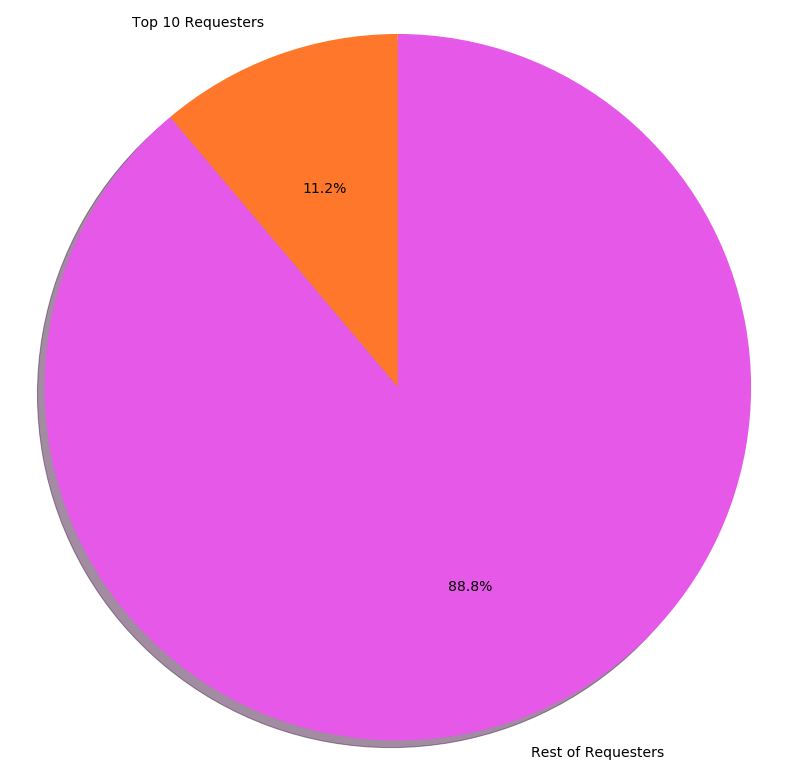

In [88]:
# print(drop_d.processed_description.value_counts())
# print(drop_d.requester_name.value_counts())

drop_d.drop_duplicates(subset=['processed_description'], keep=False, inplace=True)

print(drop_d.processed_description.value_counts())
print(drop_d.requester_name.value_counts())

top_requesters = drop_d.requester_name.value_counts().index.tolist()
top_requesters = top_requesters[:10]

# top_requesters = ['Top 10 Requesters']
top_requesters.append('Rest of Requesters')

chart_labels = ['Top 10 Requesters', 'Rest of Requesters']
# top_requesters.append('Total HITs')
description_count = drop_d.requester_name.value_counts().tolist()

print(sum(description_count))

print(sum(description_count[:10]) + sum(description_count[10:]))

print(top_requesters)


hit_count = description_count[:10]
# hit_count = [sum(description_count[:10])]
hit_count.append(sum(description_count[10:]))

dist_count = [sum(description_count[:10]), sum(description_count[10:])]
# hit_count.append(sum(description_count))
print(hit_count)
print(sum(hit_count))


top_requesters_df = pd.DataFrame(hit_count, columns = ['Number of HITs'], index=top_requesters)

print(top_requesters_df)
print(top_requesters_df.to_latex(index=True))

plt.rcParams['font.size'] = 14.0

colors = ['#FF772B', '#E658E8', '#6E91FF', '#58E8A7', '#EFFF61', 
          '#CF3CFF', '#3198E8', '#42FF52', '#EBD25B', '#FF6236', 
          '#77334a'
         ]



# Pie chart, where the slices will be ordered and plotted counter-clockwise:
fig1, ax1 = plt.subplots(figsize=(14, 14))

ax1.pie(dist_count, labels=chart_labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.rcParams['font.size'] = 14.0
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig('results_figures/hit_analysis/description-post-top10-pi.png')
plt.show()
 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


answer survey preferences minutes                                  1
exploring websites choose                                          1
short survey hotels minutes                                        1
interpersonal relationship minutes                                 1
select category describes text                                     1
                                                                  ..
attorneys decision making study                                    1
business allowed employees work consecutive hour shifts            1
question survey based child                                        1
motorcycles privates commercial motors part business operations    1
question survey based home owner amazon prime member               1
Name: processed_title, Length: 3148, dtype: int64
SET Master Account    97
quarrel-recast        91
Plancky               60
PickFu                45
Alexey Kuznetsov      44
                      ..
NLE Summarization      1
Madison Smith   

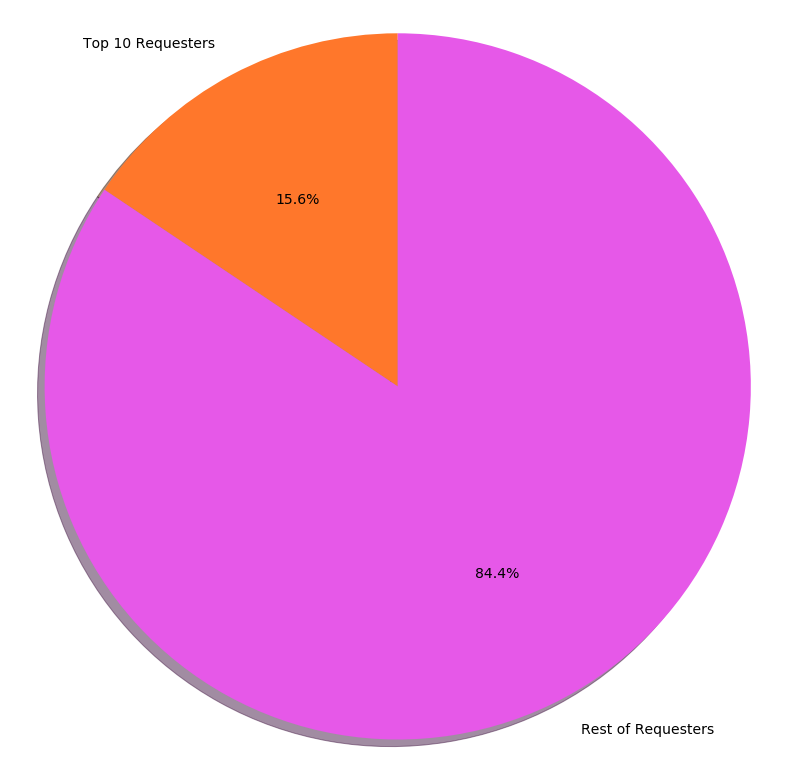

In [91]:
# print(drop_d.processed_description.value_counts())
# print(drop_d.requester_name.value_counts())

drop_t.drop_duplicates(subset=['processed_title'], keep=False, inplace=True)

print(drop_t.processed_title.value_counts())
print(drop_t.requester_name.value_counts())

top_requesters = drop_t.requester_name.value_counts().index.tolist()
top_requesters = top_requesters[:10]

# top_requesters = ['Top 10 Requesters']
top_requesters.append('Rest of Requesters')

chart_labels = ['Top 10 Requesters', 'Rest of Requesters']
# top_requesters.append('Total HITs')
title_count = drop_t.requester_name.value_counts().tolist()

print(sum(title_count))

print(sum(title_count[:10]) + sum(title_count[10:]))

print(top_requesters)


hit_count = title_count[:10]
# hit_count = [sum(description_count[:10])]
hit_count.append(sum(title_count[10:]))

dist_count = [sum(title_count[:10]), sum(title_count[10:])]
# hit_count.append(sum(description_count))
print(hit_count)
print(sum(hit_count))


top_requesters_df = pd.DataFrame(hit_count, columns = ['Number of HITs'], index=top_requesters)

print(top_requesters_df)
print(top_requesters_df.to_latex(index=True))

plt.rcParams['font.size'] = 14.0

colors = ['#FF772B', '#E658E8', '#6E91FF', '#58E8A7', '#EFFF61', 
          '#CF3CFF', '#3198E8', '#42FF52', '#EBD25B', '#FF6236', 
          '#77334a'
         ]



# Pie chart, where the slices will be ordered and plotted counter-clockwise:
fig1, ax1 = plt.subplots(figsize=(14, 14))

ax1.pie(dist_count, labels=chart_labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.rcParams['font.size'] = 14.0
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig('results_figures/hit_analysis/title-post-top10-pi.png')
plt.show()
 

In [51]:
import matplotlib.pyplot as plt

top_requesters = drop_d.requester_name.value_counts().index.tolist()
top_requesters = top_requesters[:10]

top_requesters.append('Rest of Requesters')

description_count = drop_d.requester_name.value_counts().tolist()

print(sum(description_count))

print(sum(description_count[:10]) + sum(description_count[10:]))
# rest_hit_cnt = top_req_hit_cnt[9:]

# top_req_hit_cnt = top_req_hit_cnt[:10]

# rest_req_hit_cnt = sum(rest_hit_cnt[10:])

# print(top_requesters)

# top_req_hit_cnt.append(rest_req_hit_cnt)

# print(top_req_hit_cnt)

# print(sum(top_req_hit_cnt))
# print(len(top_req_hit_cnt))


# requester_label = [ 'Requester #1', 'Requester #2','Requester #3','Requester #4','Requester #5','Requester #6','Requester #7',
#                   'Requester #8','Requester #9', 'Requester #10', 'Rest of Requesters'
#                   ]

# colors = ['#FF772B', '#E658E8', '#6E91FF', '#58E8A7', '#EFFF61', 
#           '#CF3CFF', '#3198E8', '#42FF52', '#EBD25B', '#FF6236', 
#           '#77334a'
#          ]
# print(len(requester_label))

# print(requester_label)
# # Pie chart, where the slices will be ordered and plotted counter-clockwise:


# fig1, ax1 = plt.subplots(figsize=(14, 14))

# ax1.pie(top_req_hit_cnt, labels=requester_label, colors=colors, autopct='%1.1f%%',
#         shadow=True, startangle=90)
# plt.rcParams['font.size'] = 14.0
# ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# # plt.savefig('results_figures/hit_analysis/top10-pi.png')
# plt.show()


2744
2744


In [ ]:
count_nan = len(hits['processed_description']) - hits['processed_description'].count()

print(count_nan)

count_nan = len(hits['processed_title']) - hits['processed_title'].count()

print(count_nan)

print(hits['processed_description'].shape)
print(hits['processed_title'].shape)



In [ ]:
# drop_df = hits.dropna(axis=1, how='any')

# print(drop_df['processed_title'].shape)


In [ ]:
# hits = hits.dropna()
print('INFO: shape of HITS df after drop na: {}'.format(hits.shape))
hits.head(100)

print('INFO: processed_description shape after removing stopwords, duplicates, and numbers', hits['processed_description'].shape[0])

print('INFO: processed_title shape after removing stopwords, duplicates, and numbers', hits['processed_title'].shape[0])

In [ ]:
hits['requester_name'].nunique()

In [ ]:
hits['requester_id'].nunique()

In [ ]:
hits['requester_name'].value_counts().head(10)

In [ ]:
print(hits)